In [4]:
import pygrib
import os
import numpy as np
import sys
sys.path.extend(['/home/bastien/Documents/work/mermoz', 
                 '/home/bastien/Documents/work/mermoz/src',
                 '/home/bastien/Documents/work/mdisplay',
                 '/home/bastien/Documents/work/mdisplay/src'])
from mermoz.wind import DiscreteWind
from mermoz.mdf_manager import MDFmanager
from mermoz.params_summary import ParamsSummary
from mermoz.misc import *
from mdisplay.geodata import GeoData

In [6]:
data_dir = '/home/bastien/Documents/data/wind/ncdc/20220301'
output_path = '/home/bastien/Documents/data/wind/ncdc/'
# Extraction bounds
#bl = np.array((-66.10, 18.46))
#tr = np.array((-6.26, 53.35))
gd = GeoData()
bl = np.array(gd.get_coords('Natal'))
tr = np.array(gd.get_coords('Dakar'))
offset = 0.1 * (tr - bl)
bl = bl - offset
tr = tr + offset
# Data files
gribfiles = sorted(os.listdir(data_dir))
date_start = gribfiles[0].split('_')[2]
hour_start = gribfiles[0].split('_')[3][:2]

slon = str(abs(round(bl[0]))) + ('W' if bl[0] < 0 else 'E')
slat = str(abs(round(bl[1]))) + ('S' if bl[0] < 0 else 'N')
tlon = str(abs(round(tr[0]))) + ('W' if bl[0] < 0 else 'E')
tlat = str(abs(round(tr[1]))) + ('S' if bl[0] < 0 else 'N')

name = f'{slon}_{slat}_{tlon}_{tlat}_{date_start}_{hour_start}'

output_dir = os.path.join(output_path, name)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

grib_fps = list(map(lambda gf: os.path.join(data_dir, gf), gribfiles))

mdfm = MDFmanager()
mdfm.set_output_dir(output_dir)
print(mdfm.dump_wind_from_grib2(grib_fps, bl, tr))

(13, 42, 49)


In [1]:
import pygrib

In [51]:
f = pygrib.open('/home/bastien/Documents/data/wind/meteo-france/test2.grib2')

In [52]:
f.seek(0)
for grb in f:
    print(grb)

1:Time integral of rain flux:kg m**-2 (accum):regular_ll:surface:level 0:fcst time 0-42 hrs (accum):from 202212090000
2:Snow precipitation rate:kg m**-2 s**-1 (accum):regular_ll:surface:level 0:fcst time 0-42 hrs (accum):from 202212090000
3:Graupel (snow pellets) precipitation rate:kg m-2 s-1 (accum):regular_ll:surface:level 0:fcst time 0-42 hrs (accum):from 202212090000
4:Surface pressure:Pa (instant):regular_ll:surface:level 0:fcst time 42 hrs:from 202212090000
5:Low cloud cover:% (instant):regular_ll:surface:level 0:fcst time 42 hrs:from 202212090000
6:High cloud cover:% (instant):regular_ll:surface:level 0:fcst time 42 hrs:from 202212090000
7:Medium cloud cover:% (instant):regular_ll:surface:level 0:fcst time 42 hrs:from 202212090000
8:Convective Available Potential Energy instantaneous:m**2 s**-2 (instant):regular_ll:unknown:levels 0-3000:fcst time 42 hrs:from 202212090000
9:193:193 (instant):regular_ll:surface:level 0:fcst time 42 hrs:from 202212090000


In [20]:
u_wind = f.select(name='100 metre U wind component')[0].data()

In [40]:
v_wind = f.select(name='100 metre V wind component')[0].data()

In [53]:
rain = f.select(name='Time integral of rain flux')[0].data()

In [28]:
f.select(name='100 metre U wind component')[0]

6:100 metre U wind component:m s**-1 (instant):regular_ll:heightAboveGround:level 100 m:fcst time 42 hrs:from 202212090000

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
nx, ny =u_wind[0].data.shape

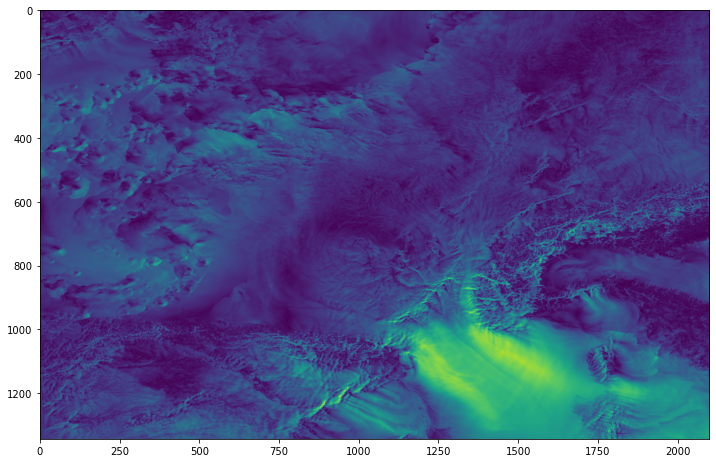

In [44]:
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(np.sqrt(u_wind[0].data[nx//8:-nx//8, ny//8:-ny//8]**2 + v_wind[0].data[nx//8:-nx//8, ny//8:-ny//8]**2))

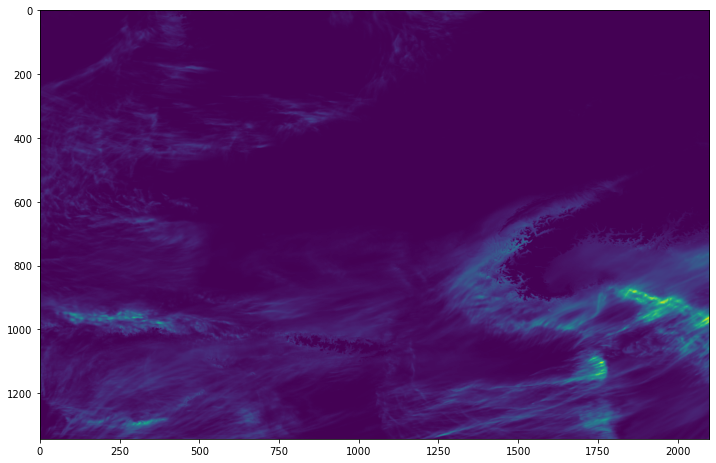

In [55]:
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(rain[0][nx//8:-nx//8, ny//8:-ny//8])